In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
df = pd.DataFrame({'X' : list(range(0, 100))})
df.head()

,X
0,0
1,1
2,2
3,3
4,4


In [104]:
df['y'] = 0
df['y'][df['X'] >= 50] = 1
df.tail()

,X,y
95,95,1
96,96,1
97,97,1
98,98,1
99,99,1


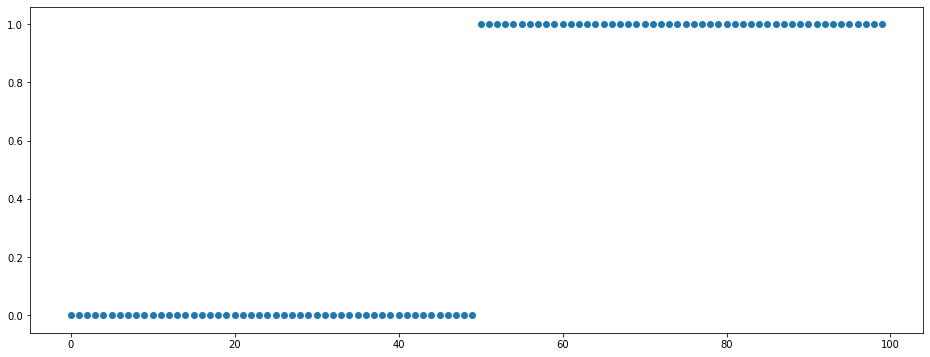

In [105]:
plt.figure(figsize = (16, 6))
plt.scatter(df['X'], df['y'])

[[-0.88282215  0.1356024 ]]
[[-0.88636115  0.0256784 ]]
[[-0.88653015  0.0180844 ]]


array([[-0.88653015,  0.0180844 ]])

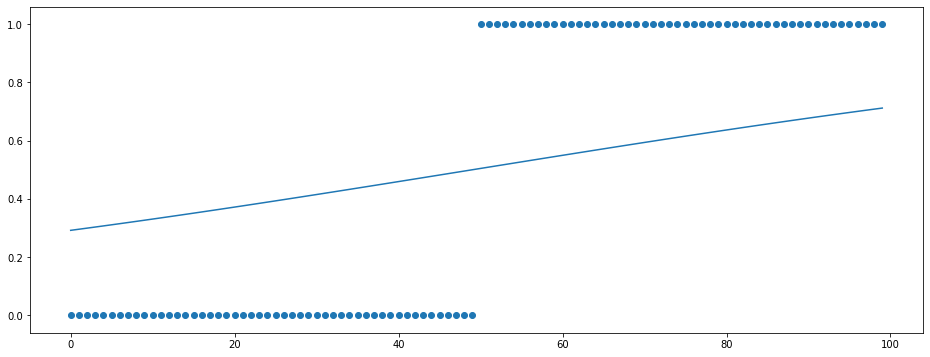

In [290]:
plt.figure(figsize = (16, 6))
plt.scatter(df['X'], df['y'])

X = df.iloc[:, [0]].values
y = df.iloc[:, 1].values

x0 = np.ones((X.shape[0], 1))
X = np.hstack((x0, X))

y = y.reshape(1, -1)

np.random.seed(180)
theta = np.random.randn(1, X.shape[1])
costs = []
# Loop starts Here
for epochs in range(250):
    h_theta_of_X = np.dot(theta, X.T)
    h_theta_of_X = 1 / (1 + np.exp(-1 * h_theta_of_X))
#     print(h_theta_of_X)

#################################################################################################################
    # Cost Function
    cost = 0
    for i in range(len(y[0])):
        cost += ((-1) * y[0][i] * np.log(h_theta_of_X[0][i])) - ((1 - y[0][i]) * np.log(1 - h_theta_of_X[0][i]))
    cost = (-1 * cost) / len(y[0])
    costs.append(cost)
#################################################################################################################

    for i in range(len(h_theta_of_X[0])):
        if h_theta_of_X[0][i] <= 0.5:
            h_theta_of_X[0][i] = 0.0
        else:
            h_theta_of_X[0][i] = 1


            
#################################################################################################################
    # Gradient Descent Function
    updater = np.zeros(theta.shape)

    for i in range(len(y[0])):
        updater += ((h_theta_of_X[0][i] - y[0][i]) * X[i])

    theta -= updater * 0.000001
#################################################################################################################

    if epochs % 100 == 0:
        print(theta)
plt.plot(df.iloc[:, [0]].values, 1 / (1 + np.exp(-1 * np.dot(theta, X.T).T)))
theta

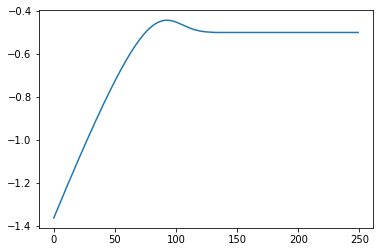

In [291]:
plt.plot(list(range(len(costs))), costs)

In [292]:
h_theta_of_X

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

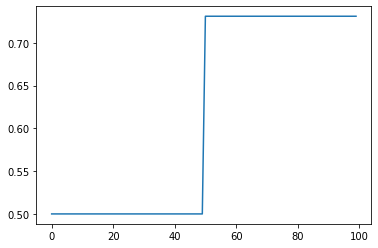

In [293]:
X = df.iloc[:, [0]].values

plt.plot(X, 1 / (1 + np.exp(-1 * h_theta_of_X.T)))

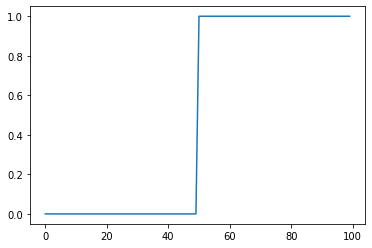

In [294]:
X = df.iloc[:, [0]].values

plt.plot(X, h_theta_of_X.T)